In [1]:
import pandas as pd
import seaborn as sns
import networkx as nx
import numpy as np
import re
import matplotlib.pyplot as plt
import itertools
import sklearn.datasets
from sklearn.metrics.pairwise import euclidean_distances
import math
import random
import Graph_Sampling as gs

In [2]:
def generateRandomGraph(num_nodes, num_edges):
    # Generate a random graph
    G = nx.gnm_random_graph(num_nodes, num_edges)

    # Ensure all nodes have at least degree 1
    for node in G.nodes:
        if G.degree[node] == 0:
            # Find a random node to connect with
            target = random.choice(list(G.nodes))
            while target == node or G.has_edge(node, target):
                target = random.choice(list(G.nodes))
            G.add_edge(node, target)
    return G

In [3]:
randomG = generateRandomGraph(10,15)
randomG.edges

EdgeView([(0, 6), (1, 7), (1, 5), (1, 2), (2, 3), (2, 8), (3, 4), (3, 8), (3, 9), (4, 7), (4, 5), (4, 9), (6, 9), (6, 7), (7, 8)])

In [4]:
def generateProbabilityList(G : nx.Graph):
    probList = []
    for node in G.nodes:
        for _ in range(0, G.degree[node]):
            probList.append(node)
    return probList

# n wanted nodes, m edges for new n
def BAModel(G : nx.Graph, n, m):
    random.seed()
    while len(G.nodes) < n:
        probList = generateProbabilityList(G)
        currentNode = len(G.nodes)
        G.add_node(currentNode) # Add new node with index of len G.nodes
        for i in range(0,m):
            # Need to add check for same edges or multiple edges
            rIndex = random.randint(0,len(probList) - 1)
            while (currentNode, probList[rIndex]) in G.edges: # Generate new nodes to connect to till you find edge that doesnt exist yet
                rIndex = random.randint(0,len(probList) - 1)
            G.add_edge(currentNode, probList[rIndex])
    return G


In [5]:
BAGraph2 = randomG.copy()
BAGraph2 = BAModel(BAGraph2, 5000, 2)

In [6]:
sample_size = len(BAGraph2.nodes) * 0.15
sample_size

750.0

In [7]:
def RandomNodeSampling(G, sample_size):
    sample = nx.Graph()
    newNodes = []
    random.seed()
    rIdx = random.uniform(0, len(G.nodes) - 1)
    while len(sample.nodes) <= sample_size: # Loop till you pick enough nodes
        while list(G.nodes)[rIdx] in newNodes: # Generate new index till you find new node
            rIdx = random.uniform(0, len(G.nodes) - 1)
        newNodes.append(list(G.nodes)[rIdx])
    possibleEdges = []
    for i in newNodes:
        for j in newNodes:
            if (i,j) in list(G.edges) or (j, i) in list(G.edges):
                pass

In [8]:
ffSampling = gs.ForestFire()
sampled_graphFF = ffSampling.forestfire(BAGraph2, sample_size)

In [9]:
sampled_graphFF.edges()

EdgeView([(3802, 10), (3802, 3250), (10, 6), (10, 2), (10, 11), (10, 14), (10, 20), (10, 25), (10, 32), (10, 38), (10, 79), (10, 97), (10, 156), (10, 167), (10, 268), (10, 269), (10, 287), (3250, 1180), (3250, 2581), (6, 0), (6, 9), (6, 7), (6, 13), (6, 16), (6, 17), (6, 29), (6, 48), (6, 51), (6, 56), (6, 58), (6, 59), (6, 65), (6, 66), (6, 70), (6, 76), (6, 81), (6, 83), (6, 86), (6, 103), (6, 105), (6, 117), (6, 153), (6, 154), (6, 162), (6, 170), (6, 179), (6, 188), (6, 194), (6, 197), (6, 203), (6, 216), (6, 217), (6, 239), (6, 299), (6, 334), (6, 338), (6, 379), (6, 404), (6, 409), (6, 427), (6, 455), (6, 507), (6, 525), (6, 576), (6, 579), (6, 632), (6, 644), (6, 660), (6, 714), (6, 728), (6, 832), (6, 863), (6, 953), (6, 985), (6, 989), (6, 1073), (6, 1074), (6, 1107), (6, 1164), (6, 1168), (6, 1213), (6, 1297), (6, 1377), (6, 1521), (6, 1605), (6, 1626), (6, 1633), (6, 1681), (6, 1949), (6, 2036), (6, 2078), (6, 2084), (6, 2110), (6, 2116), (6, 2159), (6, 2162), (6, 2174), (6,

In [10]:
# Pick random initial node
idx = random.randint(0, len(BAGraph2.nodes) - 1)
mhrwSamplig = gs.MHRW()
sampled_graphMHRW = mhrwSamplig.mhrw(BAGraph2, list(BAGraph2.nodes)[idx], sample_size)
sampled_graphMHRW.edges()


EdgeView([(2557, 3146), (743, 2969), (743, 294), (2969, 343), (343, 1361), (1361, 4241), (4241, 2125), (2125, 1289), (1289, 26), (26, 781), (781, 466), (466, 180), (180, 4758), (4758, 2354), (2354, 1175), (1175, 4016), (1129, 4524), (4524, 1318), (1318, 1972), (2776, 697), (697, 1154), (1950, 20), (20, 261), (261, 876), (882, 1418), (1418, 645), (645, 712), (712, 4809), (2356, 1580), (1580, 345), (345, 136), (136, 1290), (1721, 4820), (1721, 1327), (1327, 13), (13, 1809), (2506, 428), (428, 2600), (1199, 3656), (3656, 2425), (2425, 539), (539, 264), (264, 77), (77, 526), (526, 3613), (3613, 912), (912, 2670), (4632, 2913), (2913, 1624), (3460, 1313), (1313, 4209), (4770, 4277), (4277, 2774), (2774, 2640), (2640, 1235), (1235, 3428), (1141, 86), (86, 9), (9, 2697), (1050, 3020), (3020, 1044), (1044, 2767), (2767, 413), (413, 186), (186, 510), (2536, 4894), (154, 1462), (154, 718), (718, 3090), (3090, 1725), (1725, 511), (511, 3344), (3344, 61), (61, 2531), (2531, 2907), (1844, 3396), (3

In [11]:
snowballSampling = gs.Snowball()
sampled_graphSnowball = snowballSampling.snowball(BAGraph2, sample_size, 10)
sampled_graphSnowball.edges()

EdgeView([(1301, 1184), (1301, 349), (1301, 2135), (1184, 1170), (1184, 764), (1184, 1191), (1184, 2868), (1184, 2955), (1184, 3281), (349, 343), (349, 243), (349, 448), (349, 451), (349, 478), (349, 489), (349, 499), (349, 1237), (349, 1346), (2135, 1253), (2135, 2220), (2135, 3988), (498, 233), (498, 2), (498, 1444), (233, 88), (233, 41), (233, 411), (233, 616), (233, 798), (233, 931), (233, 940), (233, 1061), (233, 2206), (2, 1), (2, 3), (2, 8), (2, 10), (2, 19), (2, 21), (2, 23), (2, 26), (2, 37), (2, 39), (2, 125), (2, 664), (2, 160), (2, 519), (1444, 68), (1444, 1483), (1444, 1615), (1444, 2062), (1444, 2606), (1444, 2992), (1444, 3012), (1444, 3084), (1444, 4716), (4991, 2627), (4991, 2649), (2627, 51), (2627, 454), (2627, 2773), (2627, 3409), (2627, 3490), (2627, 3873), (2649, 1277), (2649, 608), (3456, 3), (3456, 145), (3, 4), (3, 8), (3, 9), (3, 11), (3, 17), (3, 18), (3, 23), (3, 30), (3, 34), (3, 145), (3, 143), (3, 88), (3, 1615), (3, 122), (3, 90), (145, 141), (145, 246),

In [12]:
def getDegreeDistribution(original : nx.Graph, samples : list[nx.Graph]):
    maxDegree = max([degree for node, degree in original.degree])
    distribution = {"degree": [], "original": [], "FF": [], "MHRW": [], "Snowball": []}
    names = ["FF", "MHRW", "Snowball"]
    originalDegrees = [degree for node, degree in original.degree]
    sampleDegrees = [[degree for node, degree in samples[0].degree], [degree for node, degree in samples[1].degree], [degree for node, degree in samples[2].degree]] # Add degrees lists for each sample
    #print(sampleDegrees[0])
    for degree in range(1, maxDegree + 1):
        sampleDegreeCounts = []
        originalDegreeCount = len([i for i in originalDegrees if i >= degree])
        for j in range(0, len(samples)):
            sampleDegreeCounts.append((names[j], len([i for i in sampleDegrees[j] if i >= degree])))
        distribution["degree"].append(degree)
        distribution["original"].append(originalDegreeCount)
        distribution["FF"].append(sampleDegreeCounts[0][1])
        distribution["MHRW"].append(sampleDegreeCounts[1][1])
        distribution["Snowball"].append(sampleDegreeCounts[2][1])
    return distribution

In [13]:
distribution = getDegreeDistribution(BAGraph2, [sampled_graphFF, sampled_graphMHRW, sampled_graphSnowball])

In [14]:
dfDegreeDistribution = pd.DataFrame(distribution)

In [15]:
dfDegreeDistribution.loc[(dfDegreeDistribution["original"] >= 750),"original"] = 750

In [16]:
dfDegreeDistribution = dfDegreeDistribution.drop("degree", axis=1)
dfDegreeDistribution.index += 1

In [17]:
dfDegreeDistribution

,original,FF,MHRW,Snowball
1,750,750,751,754
2,750,155,411,266
3,750,71,2,157
4,750,57,0,119
5,750,51,0,103
...,...,...,...,...
142,1,0,0,0
143,1,0,0,0
144,1,0,0,0
145,1,0,0,0


In [18]:
dfDegreeDistribution.loc[(dfDegreeDistribution["FF"] == 0) & (dfDegreeDistribution["Snowball"] == 0) & (dfDegreeDistribution["original"] < 5)]

,original,FF,MHRW,Snowball
116,4,0,0,0
117,4,0,0,0
118,3,0,0,0
119,3,0,0,0
120,3,0,0,0
121,3,0,0,0
122,3,0,0,0
123,3,0,0,0
124,3,0,0,0
125,3,0,0,0


In [19]:
dfDegreeDistribution.drop(dfDegreeDistribution.loc[(dfDegreeDistribution["FF"] == 0) & (dfDegreeDistribution["Snowball"] == 0) & (dfDegreeDistribution["original"] < 5)].index, inplace=True)
dfDegreeDistribution

,original,FF,MHRW,Snowball
1,750,750,751,754
2,750,155,411,266
3,750,71,2,157
4,750,57,0,119
5,750,51,0,103
...,...,...,...,...
111,5,0,0,0
112,5,0,0,0
113,5,0,0,0
114,5,0,0,0


[]

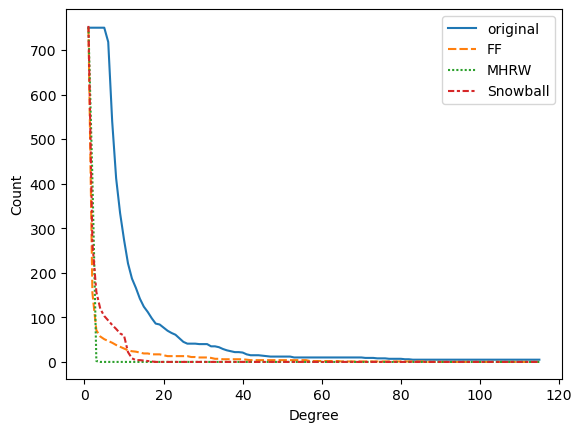

In [20]:
sns.lineplot(data=dfDegreeDistribution)
plt.ylabel("Count")
plt.xlabel("Degree")
plt.plot()

In [22]:
def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y

Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...


e:\Anaconda\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\Anaconda\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: title={'center': '\nDistribution Of Node Linkages (log-log scale)'}, xlabel='Degree\n(log scale)', ylabel='Number of Nodes\n(log scale)'>

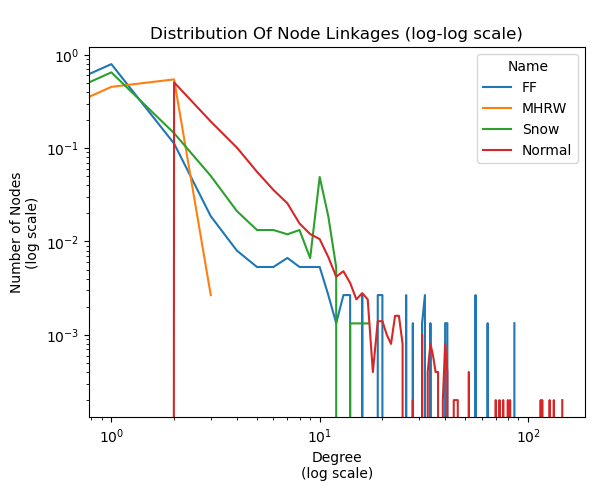

In [26]:
aux_xFF, aux_yFF = plot_degree_histogram(sampled_graphFF)
aux_xMHRW, aux_yMHRW = plot_degree_histogram(sampled_graphMHRW)
aux_xSnow, aux_ySnow = plot_degree_histogram(sampled_graphSnowball)
aux_xNormal, aux_yNormal = plot_degree_histogram(BAGraph2)
line1 = {"Degree": aux_xFF, "Count": aux_yFF, "Name": "FF"}
line2 = {"Degree": aux_xMHRW, "Count": aux_yMHRW, "Name": "MHRW"}
line3 = {"Degree": aux_xSnow, "Count": aux_ySnow, "Name": "Snow"}
line4 = {"Degree": aux_xNormal, "Count": aux_yNormal, "Name": "Normal"}

dfPlot = pd.concat(
    [
        pd.DataFrame(line1),
        pd.DataFrame(line2),
        pd.DataFrame(line3),
        pd.DataFrame(line4),
    ]
)

plt.title('\nDistribution Of Node Linkages (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
sns.lineplot(data= dfPlot, x="Degree", y="Count", hue="Name")

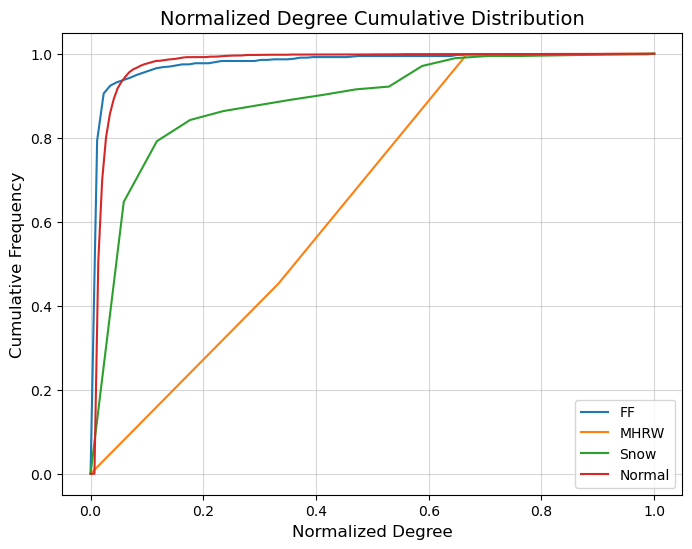

In [30]:
def getCumulativeDistribution(G, max_degree):

    degree_sequence = [d for n, d in G.degree()]  # List of degrees
    max_degree = max(degree_sequence)  # Maximum degree in the graph
    degree_counts = np.bincount(degree_sequence)  # Count occurrences of each degree
    degrees = np.arange(len(degree_counts))  # Degree values

    # Normalize degrees
    normalized_degrees = degrees / max_degree if max_degree > 0 else degrees

    cumulative_distribution = np.cumsum(degree_counts) / sum(degree_counts)

    return normalized_degrees, cumulative_distribution
max_degree = max(BAGraph2)
aux_xFF, aux_yFF = getCumulativeDistribution(sampled_graphFF, max_degree)
aux_xMHRW, aux_yMHRW = getCumulativeDistribution(sampled_graphMHRW, max_degree)
aux_xSnow, aux_ySnow = getCumulativeDistribution(sampled_graphSnowball, max_degree)
aux_xNormal, aux_yNormal = getCumulativeDistribution(BAGraph2, max_degree)
line1 = {"Degree": aux_xFF, "Frequency": aux_yFF, "Name": "FF"}
line2 = {"Degree": aux_xMHRW, "Frequency": aux_yMHRW, "Name": "MHRW"}
line3 = {"Degree": aux_xSnow, "Frequency": aux_ySnow, "Name": "Snow"}
line4 = {"Degree": aux_xNormal, "Frequency": aux_yNormal, "Name": "Normal"}

dfPlot = pd.concat(
    [
        pd.DataFrame(line1),
        pd.DataFrame(line2),
        pd.DataFrame(line3),
        pd.DataFrame(line4),
    ]
)
# Step 4: Plot the degree cumulative distribution with normalized degree values
plt.figure(figsize=(8, 6))
sns.lineplot(data=dfPlot, x = "Degree", y="Frequency", hue="Name")
plt.title("Normalized Degree Cumulative Distribution", fontsize=14)
plt.xlabel("Normalized Degree", fontsize=12)
plt.ylabel("Cumulative Frequency", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()


In [31]:
dfPlot

,Degree,Frequency,Name
0,0.000000,0.000000,FF
1,0.011628,0.793333,FF
2,0.023256,0.905333,FF
3,0.034884,0.924000,FF
4,0.046512,0.932000,FF
...,...,...,...
142,0.972603,0.999800,Normal
143,0.979452,0.999800,Normal
144,0.986301,0.999800,Normal
145,0.993151,0.999800,Normal


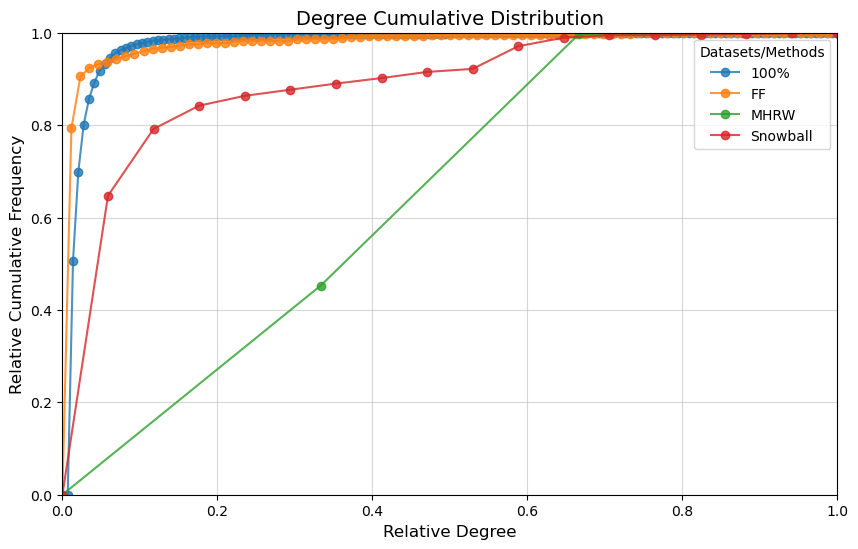

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to compute normalized degree cumulative distribution
def compute_cumulative_distribution(G):
    degree_sequence = [d for n, d in G.degree()]  # List of degrees
    if len(degree_sequence) == 0:
        return [], []  # Handle empty graph
    max_degree = max(degree_sequence)
    degree_counts = np.bincount(degree_sequence)
    degrees = np.arange(len(degree_counts))
    normalized_degrees = degrees / max_degree if max_degree > 0 else degrees
    cumulative_distribution = np.cumsum(degree_counts) / sum(degree_counts)
    return normalized_degrees, cumulative_distribution

# Step 1: Create multiple random graphs (representing different datasets or methods)
graphs = {
    "100%": BAGraph2,
    "FF": sampled_graphFF,
    "MHRW": sampled_graphMHRW,
    "Snowball": sampled_graphSnowball,
}

# Step 2: Compute the cumulative distribution for each graph
data = {}
for name, graph in graphs.items():
    x, y = compute_cumulative_distribution(graph)
    data[name] = (x, y)

# Step 3: Plot the degree cumulative distributions
plt.figure(figsize=(10, 6))
for name, (x, y) in data.items():
    plt.plot(x, y, label=name, marker="o", linestyle="-", alpha=0.8)

# Step 4: Customize the plot
plt.title("Degree Cumulative Distribution", fontsize=14)
plt.xlabel("Relative Degree", fontsize=12)
plt.ylabel("Relative Cumulative Frequency", fontsize=12)
plt.legend(title="Datasets/Methods", fontsize=10)
plt.grid(alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


In [38]:
import networkx as nx
import numpy as np
from scipy.stats import ks_2samp

# Funkce pro získání distribuce stupňů
def get_degree_distribution(graph):
    degrees = [d for n, d in graph.degree()]
    return degrees

# Vytvoření původní sítě
original_graph = BAGraph2  # Původní síť

# Vytvoření vzorků (simulované podgrafy)
sample_graphs = {
    "FF": sampled_graphFF,
    "MHRW": sampled_graphMHRW,
    "Snowball": sampled_graphSnowball
}

# Distribuce stupňů pro původní síť
original_degrees = get_degree_distribution(original_graph)

# Provedení KS testu a výpočet D-hodnot
results = {}
for name, sample_graph in sample_graphs.items():
    sample_degrees = get_degree_distribution(sample_graph)
    D_value, p_value = ks_2samp(original_degrees, sample_degrees)
    samp = ks_2samp(original_degrees, sample_degrees)
    results[name] = {"D-value": D_value, "p-value": p_value, "statistical_location": samp.statistic_location}

# Výpis výsledků
print("KS Test Results (Comparison of Degree Distributions):")
for name, result in results.items():
    print(f"{name}: D-value = {result['D-value']:.4f}, p-value = {result['p-value']:.4f}, statistical_location: {result['statistical_location']:.4f}")


KS Test Results (Comparison of Degree Distributions):
FF: D-value = 0.7933, p-value = 0.0000, statistical_location: 1.0000
MHRW: D-value = 0.4911, p-value = 0.0000, statistical_location: 2.0000
Snowball: D-value = 0.6472, p-value = 0.0000, statistical_location: 1.0000


# Závěr
Nejlépe distribuci stupňů zachovala sampling metoda Forest Fire.